<center><h1> Tarea 1 Machine Learning </h1></center>
<center><h3> Matías Ramírez Marianetti | Javier Rodríguez Aguilera</h3></center>
<center><h3> 201173506-4 | 201173553-6 </h3></center>
<center><h3> matias.ramirezm@alumnos.usm.cl | javier.rodriguez@alumnos.usm.cl </h3></center>

# Pregunta 1

Se utilizará un pequeño dataset de nombre prostate-cancer el cual es usado con frecuencia para realizar pruebas priliminares de con métodos de regresión. Estos datos consisten en la eventual correlación entre el nivel de antígeno prostático específico medido de un paciente, y otra serie de otras mediciones clínicas obtenidas después de practicar al paciente una prostatectonía radical.

##  a)

Para comenzar entre las lineas cinco(5) y nueve(9) de este algoritmo se elimina la columna que contiene el número de cada registro del dataset, de esta forma no se tendrá una variable innecesaria. Luego se toma la columna 'train' y a través de esta se generan dos arreglos, istrain e istest. En la línea de istrain se recorre la columna 'train' contenida en la variable istrain_str y se le coloca True a los datos en que 'train' sea 'T' y False en el caso contrario, de esta forma para el caso de istest se toma istrain y se invierten los valores booleanos de este. Finalmente se elimina la columna 'train', ya que sus valores serán utilizados a través de los arreglos anteriormente señalados.

Finalmente, el dataset es el siguiente:

In [1]:
import pandas as pd
import numpy as np
url = 'http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/prostate.data'
df = pd.read_csv(url, sep='\t', header=0)
df = df.drop('Unnamed: 0', axis=1)
istrain_str = df['train']
istrain = np.asarray([True if s == 'T' else False for s in istrain_str])
istest = np.logical_not(istrain)
df = df.drop('train', axis=1)

print df

      lcavol   lweight  age      lbph  svi       lcp  gleason  pgg45      lpsa
0  -0.579818  2.769459   50 -1.386294    0 -1.386294        6      0 -0.430783
1  -0.994252  3.319626   58 -1.386294    0 -1.386294        6      0 -0.162519
2  -0.510826  2.691243   74 -1.386294    0 -1.386294        7     20 -0.162519
3  -1.203973  3.282789   58 -1.386294    0 -1.386294        6      0 -0.162519
4   0.751416  3.432373   62 -1.386294    0 -1.386294        6      0  0.371564
5  -1.049822  3.228826   50 -1.386294    0 -1.386294        6      0  0.765468
6   0.737164  3.473518   64  0.615186    0 -1.386294        6      0  0.765468
7   0.693147  3.539509   58  1.536867    0 -1.386294        6      0  0.854415
8  -0.776529  3.539509   47 -1.386294    0 -1.386294        6      0  1.047319
9   0.223144  3.244544   63 -1.386294    0 -1.386294        6      0  1.047319
10  0.254642  3.604138   65 -1.386294    0 -1.386294        6      0  1.266948
11 -1.347074  3.598681   63  1.266948    0 -1.386294

##  b)

En total son 97 registros de los cuales 67 corresponden a datos de entrenamiento del modelo y 30 son para probar el modelo. las columnas del 1 al 8 son predictores, y la última corresponde a la etiqueta de cada registro.

La tabla siguiente muestra la naturaleza y disribución de los datos.

In [2]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 9 columns):
lcavol     97 non-null float64
lweight    97 non-null float64
age        97 non-null int64
lbph       97 non-null float64
svi        97 non-null int64
lcp        97 non-null float64
gleason    97 non-null int64
pgg45      97 non-null int64
lpsa       97 non-null float64
dtypes: float64(5), int64(4)
memory usage: 6.9 KB


,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,1.350010,3.628943,63.865979,0.100356,0.216495,-0.179366,6.752577,24.381443,2.478387
std,1.178625,0.428411,7.445117,1.450807,0.413995,1.398250,0.722134,28.204035,1.154329
min,-1.347074,2.374906,41.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,-0.430783
25%,0.512824,3.375880,60.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,1.731656
50%,1.446919,3.623007,65.000000,0.300105,0.000000,-0.798508,7.000000,15.000000,2.591516
75%,2.127041,3.876396,68.000000,1.558145,0.000000,1.178655,7.000000,40.000000,3.056357
max,3.821004,4.780383,79.000000,2.326302,1.000000,2.904165,9.000000,100.000000,5.582932


##  c)

Antes de de poder crear el modelo y analizar los datos esnecesario normalizar los datos para arreglar las varianzas y de esta forma dejar los datos respecto a un mismo punto.

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled['lpsa'] = df['lpsa']

##  d)

Lo importante del tercer paso en este caso, es agregar una nueva columna que contiene solamente unos(1), los cuales denotan a $x^{(0)}$ y de esta forma definir un modelo lineal en forma matricial.

In [4]:
import sklearn.linear_model as lm
X = df_scaled.ix[:,:-1]
N = X.shape[0]
X.insert(X.shape[1], 'intercept', np.ones(N))
y = df_scaled['lpsa']
Xtrain = X[istrain]
ytrain = y[istrain]
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

## e)

Para lograr definir la variable más importante, se considera la que tiene el mayor peso $\beta$. En el caso del valor del z-score, este estandarizará los valores y de esta forma los dejará a todos en un rango cercano, el $95\%$ debería estar entre $-2$ y $2$ (desviaciones estándares del promedio) y así los valores del peso tendrán relevancia sin importar si en el dataset hay valores que tienen valores muy altos.

In [5]:
print linreg.coef_

cols = list(Xtrain.columns)
cols.remove("intercept")

Xtrain_zscores = pd.DataFrame()

for col in cols:
    col_zscore = col + '_zscore'
    Xtrain_zscores[col_zscore] = (Xtrain[col] - Xtrain[col].mean())/Xtrain[col].std(ddof=0)
    
    
#zscore_matrix = Xtrain_zscores.as_matrix().transpose().tolist()

[ 0.67601634  0.26169361 -0.14073374  0.20906052  0.30362332 -0.28700184
 -0.02119493  0.26557614  2.46493292]


De los pesos obtenidos se puede notar que el que está asociado al primer predictor tiene el mayor peso, lo que muestra que esta variable es la que tiene más relevancia con la respuesta. De la misma manera, el predictor con menor relevancia en la respuesta en el número 7, gleason, ya que presenta el menor peso del modelo. Como criterio se podría tomar en consideración las variables con un peso absoluto igual o mayor a 0.25, lo que dejaría fuera los predictores age, lbph y gleason.

## f)

En este caso se obtuvieron dos errores numéricos, los cuales luego de haber calculado su error porcentual promedio, $84.36\%$ y $72.32\%$ para $5$ y $10$ folds respectivamente, se puede decir que son bastante altos. A medida que se van aumentando los folds este error irá disminuyendo debido a que la cantidad de valores de entrenamiento aumentará por lo que el modelo tendrá un mayor volumen de datos para ajustarse correctamente.

El error del modelo sobre el conjunto de prueba es $0.5$, con un error porcentual de $22\%$. Este error de prueba es bastante mejor que los errores de entrenamiento. Lo que indica que el modelo presenta buenas predicciones en su primera etapa.

In [6]:
yhat_test = linreg.predict(Xtest)
mse_test = np.mean(np.power(yhat_test - ytest, 2))
mse_test_p = np.mean(np.absolute((yhat_test - ytest)*(100/ytest)))
from sklearn import cross_validation
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()

print "Error de prueba:"
print "mse:", mse_test
print "E%:", mse_test_p
print

K=5
k_fold = cross_validation.KFold(len(Xm),K)
mse_cv = 0
mse_cv_p = 0
for k, (train, val) in enumerate(k_fold):
    linreg = lm.LinearRegression(fit_intercept = False)
    linreg.fit(Xm[train], ym[train])
    yhat_val = linreg.predict(Xm[val])
    mse_fold = np.mean(np.power(yhat_val - ym[val], 2))
    mse_fold_p = np.mean(np.absolute((yhat_val - ym[val])*(100/ym[val])))
    mse_cv += mse_fold
    mse_cv_p += mse_fold_p
mse_cv = mse_cv / K
mse_cv_p = mse_cv_p / K

print "Error de entrenmiento, fold k = 5:"
print "mse:",mse_cv
print "E%:",mse_cv_p
print

K=10
k_fold = cross_validation.KFold(len(Xm),K)
mse_cv = 0
mse_cv_p = 0
for k, (train, val) in enumerate(k_fold):
    linreg = lm.LinearRegression(fit_intercept = False)
    linreg.fit(Xm[train], ym[train])
    yhat_val = linreg.predict(Xm[val])
    mse_fold = np.mean(np.power(yhat_val - ym[val], 2))
    mse_fold_p = np.mean(np.absolute((yhat_val - ym[val])*(100/ym[val])))
    mse_cv += mse_fold
    mse_cv_p += mse_fold_p
mse_cv = mse_cv / K
mse_cv_p = mse_cv_p / K

print "Error de entrenamiento, fold k = 10:"
print "mse:", mse_cv
print "E%", mse_cv_p

Error de prueba:
mse: 0.521274005508
E%: 23.2275472811

Error de entrenmiento, fold k = 5:
mse: 0.956514631616
E%: 84.3625056948

Error de entrenamiento, fold k = 10:
mse: 0.757237472963
E% 72.3234399351


## g)

Se procede a generar un gráfico Q-Q para corroborar la hipótesis de normlidd de los errores del modelo.

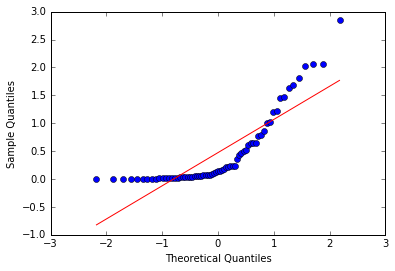

In [7]:
%matplotlib inline

import statsmodels.api as sm
import pylab

yhat_train = linreg.predict(Xtrain)
mse_train = np.power(yhat_train - ytrain, 2)

sm.qqplot(mse_train, line='r')

pylab.show()

Se rechaza la hipótesis debido a que se presenta una asimetría a la izquierda sobre la linealidad de los datos del gráfico.

# Pregunta 2

## a)

El criterio utilizado fue elegir la variable incorporada con menor error asociado. Este error es calculado mediante cross-validation con k=15.

In [16]:
errorfss = []
cantidadfss = []

def fss(x, y, names_x, k = 10000):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = range(0, p)
    selected = [p]
    current_score = 0.0
    best_new_score = 0.0
    while remaining and len(selected)<=k :
        score_candidates = []
        for candidate in remaining:
            model = lm.LinearRegression(fit_intercept=False)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            #predictions_train = model.fit(x_train, y).predict(x_train)
            #residuals_train = predictions_train - y            
            k_fold = cross_validation.KFold(len(x_train),15)
            mse_candidate = 0
            for j, (train, val) in enumerate(k_fold):
                linreg = lm.LinearRegression(fit_intercept = False)
                linreg.fit(x_train[train], y[train])
                yhat_val = linreg.predict(x_train[val])
                mse_fold = np.mean(np.power(yhat_val - y[val], 2))
                mse_candidate += mse_fold
            mse_candidate = mse_candidate/15
            #mse_candidate = np.mean(np.power(residuals_train, 2))
            score_candidates.append((mse_candidate, candidate))
            
            
        cantidadfss.append(len(selected))           
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        errorfss.append(best_new_score)
        
        print "selected = %s ..."%names_x[best_candidate]
        print "totalvars=%d, mse = %f"%(len(indexes)-1,best_new_score)
    return selected

Nuestro criterio de selección e variable dejo fuera a 'Gleason' ya que encuentra un menor local en los errores justo antes de incorporar dicha variable. Lo anterior tiene sentido ya que se corrobora a través de los pesos $\beta$, donde el asociado a esta variable es el menor.

In [17]:
names_regressors = ["lcavol", "lweight", "age", "lbph", "svi", "lcp", "gleason", "pgg45"]
indices_secuencia_fss = fss(Xm,ym,names_regressors)
print indices_secuencia_fss

selected = lcavol ...
totalvars=1, mse = 0.793672
selected = lweight ...
totalvars=2, mse = 0.684954
selected = pgg45 ...
totalvars=3, mse = 0.680069
selected = lcp ...
totalvars=4, mse = 0.679653
selected = age ...
totalvars=5, mse = 0.672212
selected = svi ...
totalvars=6, mse = 0.668243
selected = lbph ...
totalvars=7, mse = 0.639396
selected = gleason ...
totalvars=8, mse = 0.675566
[8L, 0, 1, 7, 5, 2, 4, 3, 6]


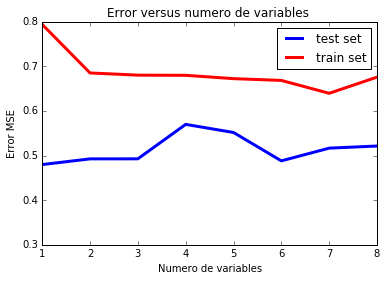

In [20]:
%matplotlib inline

secuencia_fss = []

for i in indices_secuencia_fss[1:]:
    secuencia_fss.append(names_regressors[i])

errortest = []
cantidadvariables = []


X0_train = pd.DataFrame()
X0_train['lcavol'] = Xtrain['lcavol']
Ntrain = X0_train.shape[0]

X0_test = pd.DataFrame()
X0_test['lcavol'] = Xtest['lcavol']
Ntest = X0_test.shape[0]

X0_train.insert(X0_train.shape[1], 'intercept', np.ones(Ntrain))
X0_test.insert(X0_test.shape[1], 'intercept', np.ones(Ntest))

linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(X0_train, ytrain)

yhat_test = linreg.predict(X0_test)
mse_test = np.mean(np.power(yhat_test - ytest, 2))
errortest.append(mse_test)
cantidadvariables.append(1)

for k in range(1,8):
    X0_train.insert(X0_train.shape[1], secuencia_fss[k], Xtrain[secuencia_fss[k]])
    X0_test.insert(X0_test.shape[1], secuencia_fss[k], Xtest[secuencia_fss[k]])
    #print X0_train
    linreg = lm.LinearRegression(fit_intercept = False)
    linreg.fit(X0_train, ytrain)
    
    yhat_test = linreg.predict(X0_test)
    mse_test = np.mean(np.power(yhat_test - ytest, 2))
    errortest.append(mse_test)
    cantidadvariables.append(k+1)
        
import matplotlib
import matplotlib.pyplot as plt

axes = plt.gca()
plt.plot(cantidadvariables, errortest, color='blue', linewidth=3, label = "test set")
plt.plot(cantidadfss, errorfss , color='red', linewidth=3, label = "train set")
axes.set_ylim([0.3,0.8])
plt.title('Error versus numero de variables ')
plt.legend()
plt.xlabel('Numero de variables')
plt.ylabel('Error MSE')
plt.show()

Del gráfico de puede ver que la cantidad de variables asociada al menor error para el caso del entrenamiento y de prueba son bien similares, siendo 7 y 6 respectivamente.

para el caso del error de entrenamiento, las variables óptimas a considerar son todas menos la 3, y para el caso de el error de prueba, se dejan fuera las variables 3 y 6. Lo anterior tiene sentido ya que estas dos variables son las que tienen menor peso asociado y por lo tanto menor relación con la respuesta del modelo.

## b) 

Se desea realizar análisis similar al anterior, donde esta vez se irá eliminando variables del modelo una por una para determianr un escenario óptimo.

In [32]:
erroresbss = []

def bss(x, y, names_x, k = 10000):
    p = x.shape[1]
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = range(0, p)
    selected = []
    current_score = 0.0
    best_new_score = 0.0
    while len(remaining)>2 :
        score_candidates = []
        for candidate in remaining:
            model = lm.LinearRegression(fit_intercept=False)
            indexes = remaining[:]
            indexes.remove(candidate)
            x_train = x[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            residuals_train = predictions_train - y
            mse_candidate = np.mean(np.power(residuals_train, 2))
            score_candidates.append((mse_candidate, candidate))
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate = score_candidates.pop()
        erroresbss.append(best_new_score)
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        print "removed = %s ..."%names_x[best_candidate]
        print "totalvars = %d, mse = %f"%(len(indexes)-1,best_new_score)
    
    return selected

In [33]:
indices_secuencia_bss = bss(Xm,ym,names_regressors)
print indices_secuencia_bss

removed = gleason ...
totalvars = 7, mse = 0.439363
removed = age ...
totalvars = 6, mse = 0.455818
removed = lcp ...
totalvars = 5, mse = 0.478648
removed = pgg45 ...
totalvars = 4, mse = 0.489776
removed = lbph ...
totalvars = 3, mse = 0.521011
removed = svi ...
totalvars = 2, mse = 0.553610
removed = lweight ...
totalvars = 1, mse = 0.664606
[6, 2, 5, 7, 3, 4, 1]


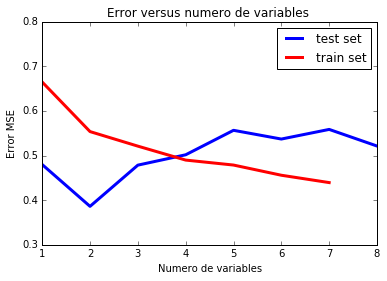

In [38]:
%matplotlib inline

secuencia_bss = []

#for i in indices_secuencia_bss[1:]:
 #   secuencia_bss.append(names_regressors[i])


secuencia_fss = []

#for i in indices_secuencia_fss[1:]:
#    secuencia_fss.append(names_regressors[i])

errortest = []
cantidadvariables = []


XBSS_train = pd.DataFrame()
XBSS_train = Xtrain
Ntrain = XBSS_train.shape[0]
#XBSS_train.insert(XBSS_train.shape[1], 'intercept', np.ones(Ntrain))

XBSS_test = pd.DataFrame()
XBSS_test = Xtest
Ntest = XBSS_test.shape[0]
#XBSS_test.insert(XBSS_test.shape[1], 'intercept', np.ones(Ntest))

linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(XBSS_train, ytrain)

yhat_test = linreg.predict(XBSS_test)
mse_test = np.mean(np.power(yhat_test - ytest, 2))
errortest.append(mse_test)


for k in range(len(indices_secuencia_bss)):
    n = indices_secuencia_bss[k-1]
    XBSS_train = XBSS_train.drop(names_regressors[n], axis=1)
    XBSS_test = XBSS_test.drop(names_regressors[n], axis=1)
   
    linreg = lm.LinearRegression(fit_intercept = False)
    linreg.fit(XBSS_train, ytrain)
    
    yhat_test = linreg.predict(XBSS_test)
    mse_test = np.mean(np.power(yhat_test - ytest, 2))
    errortest.append(mse_test)
    
    

import matplotlib
import matplotlib.pyplot as plt

axes = plt.gca()
plt.plot([8,7,6,5,4,3,2,1], errortest, color='blue', linewidth=3, label = "test set")
plt.plot([7,6,5,4,3,2,1], erroresbss , color='red', linewidth=3, label = "train set")
axes.set_ylim([0.3,0.8])
plt.title('Error versus numero de variables ')
plt.legend()
plt.xlabel('Numero de variables')
plt.ylabel('Error MSE')
plt.show()

El error de entrenamiento va aumentando a medida que dismiuye la cantidad de variables para entrenar el modelo, esto ya que entre más variables ocupa el modelo, mejor será la predicción para los mismos registros con los que se entrenó, debido al sobre ajuste que se genera.

Por otra parte, los datos de prueba muestran que con las variables 1 y 8 se logra obtener el modelo con el menor error local posible, lo cual es coherente con los pesos asociados a estas variables, que tienen harta correlación con la respuesta respecto a las demás variables.

# Pregunta 3

## a)

La Ridge Regression penalizará sus coeficientes, de tal manera que los que son menos eficientes en la estimación se achicarán de forma más rápida. Es como que se tenga un presupuesto asignado y cada coeficiente puede sacar un poco y usarlo para participar en la estimación. Los que sean más importantes tomarán una mayor cantidad. A medida que se aumenta el alpha, se está disminuyendo este presupuesto, en otras palabras, penalizando más. En el gráfico, cada línea representa un coeficiente al cual su valor va reduciéndose a cero a medida que se acorta el presupuesto o se penaliza más(se achica alpha). Si uno quisiese escojer el mejor alpha se debería consultar a un gráfico MSE vs alpha, aunque se podría decir que mientras más rápido se achique un coeficiente, menos importante es en la predicción.


(50L,)
(50L,)
(50L,)
(50L,)
(50L,)
(50L,)
(50L,)
(50L,)
(50L,)
(50L,)
(50L,)
(50L,)
(50L,)
(50L,)
(50L,)
(50L,)


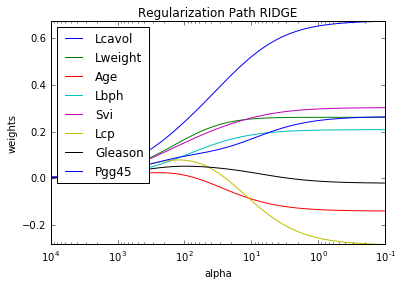

In [40]:
from sklearn.linear_model import Ridge
import matplotlib.pylab as plt

#if (X['intercept']):
 #   X = X.drop('intercept', axis=1)

Xtrain = X[istrain]
ytrain = y[istrain]
names_regressors = ["Lcavol", "Lweight", "Age", "Lbph", "Svi", "Lcp", "Gleason", "Pgg45"]
alphas_ = np.logspace(4,-1,base=10)
coefs = []
model = Ridge(fit_intercept=True,solver='svd')
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    coefs.append(model.coef_)
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    print alphas_.shape
    print y_arr.shape
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Regularization Path RIDGE')
plt.axis('tight')
plt.legend(loc=2)
plt.show()

## b)

Lasso aplica un termino de penalización a la minimización. Cuando alpha es $0$, no hay penalización y se tiene la solución OLS, esto es máximo $\beta$. Mientras la penalización aumenta, $\beta$ es llevado a $0$, con los parámetros menos importantes llevados más rapidamente. En algún punto de alpha, todos los pesos $\beta$ llegan a $0$.

(50L,)
(50L,)
(50L,)
(50L,)
(50L,)
(50L,)
(50L,)
(50L,)
(50L,)
(50L,)
(50L,)
(50L,)
(50L,)
(50L,)
(50L,)
(50L,)


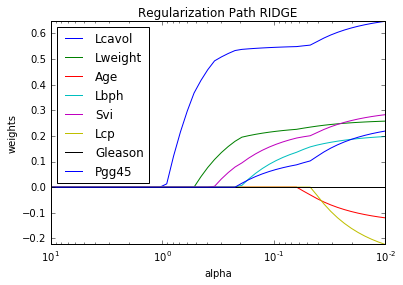

In [41]:
from sklearn.linear_model import Lasso

#X = X.drop('intercept', axis=1)
Xtrain = X[istrain]
ytrain = y[istrain]
names_regressors = ["Lcavol", "Lweight", "Age", "Lbph", "Svi", "Lcp", "Gleason", "Pgg45"]
alphas_ = np.logspace(1,-2,base=10)
coefs = []
clf = Lasso(fit_intercept=True)
for a in alphas_:
    clf.set_params(alpha=a)
    clf.fit(Xtrain, ytrain)
    coefs.append(clf.coef_)
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    print alphas_.shape
    print y_arr.shape
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Regularization Path RIDGE')
plt.axis('tight')
plt.legend(loc=2)
plt.show()

## c)

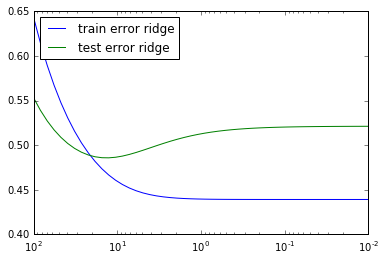

In [42]:
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
alphas_ = np.logspace(2,-2,base=10)
coefs = []
model = Ridge(fit_intercept=True)
mse_test = []
mse_train = []
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    yhat_train = model.predict(Xtrain)
    yhat_test = model.predict(Xtest)
    mse_train.append(np.mean(np.power(yhat_train - ytrain, 2)))
    mse_test.append(np.mean(np.power(yhat_test - ytest, 2)))
ax = plt.gca()
ax.plot(alphas_,mse_train,label='train error ridge')
ax.plot(alphas_,mse_test,label='test error ridge')
plt.legend(loc=2)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

A partir del punto de intersección de las curvas del gráfico hacia adelante (alpha más pequeño), se puede apreciar un sobre ajuste del modelo ya que el error de entrenamiento es menor que el de prueba.

Por otro lado, con alphas altos como en la primera parte del gráfico (de la intersección hacia atrás) se nota que con una mayor penalización significa tener pesos más grandes, lo que significa tener coeficientes más grandes y así evitar el sobre ajuste del modelo y obtener errores más pequeños.

## d)

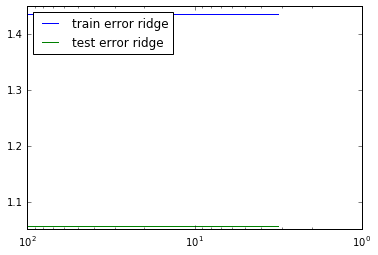

In [51]:
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
alphas_ = np.logspace(0.5,2,base=10)
coefs = []
model = Lasso(fit_intercept=True)
mse_test = []
mse_train = []
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    yhat_train = model.predict(Xtrain)
    yhat_test = model.predict(Xtest)
    mse_train.append(np.mean(np.power(yhat_train - ytrain, 2)))
    mse_test.append(np.mean(np.power(yhat_test - ytest, 2)))
ax = plt.gca()
ax.plot(alphas_,mse_train,label='train error ridge')
ax.plot(alphas_,mse_test,label='test error ridge')
plt.legend(loc=2)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

## e)

In [50]:
def MSE(y,yhat): return np.mean(np.power(y-yhat,2))
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
k_fold = cross_validation.KFold(len(Xm),10)
best_cv_mse = float("inf")
model = Lasso(fit_intercept=True)
for a in alphas_:
    model.set_params(alpha=a)
    mse_list_k10 = [MSE(model.fit(Xm[train], ym[train]).predict(Xm[val]), ym[val]) \
                    for train, val in k_fold]
    if np.mean(mse_list_k10) < best_cv_mse:
        best_cv_mse = np.mean(mse_list_k10)
        best_alpha = a
        print "BEST PARAMETER=%f, MSE(CV)=%f"%(best_alpha,best_cv_mse)

BEST PARAMETER=3.162278, MSE(CV)=1.795596
